In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Rappel de l'API matplotlib

### Numpy
On utilisera souvent la librairie numpy an appoint à matplotlib, par exemple, pour générer des séries de points necessaires aux représentations graphiques.
```python
import numpy as np
```
#### Génération de séries de valeurs: échantillons de valeurs dans deux lois normales [np.random](https://numpy.org/doc/stable/reference/random/index.html)
###### N_x(mu=1, sigma = 0.2) et N_y(mu=0, sigma=1)
Deux échantillons de tailles 1000 peuvent être générés ainsi
```python
x_data = np.random.normal(1, 0.2, 1000)
y_data = np.random.normal(0, 0.1, 1000)
```
Et dessinés ainsi,
```python
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(x_data, y_data)
ax1.set_xlabel("Mon abscisse")

```

<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous.</span>
<h5>PUIS</h5>

<span style="color:firebrick;font-weight:bold"> $\rhd$  Réaliser ce graphique dans une cellule suivante et ajouter des [légendes au axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) mentionnant les moyennes et écarts-type des distributions utilisées.</span>


Text(0.5, 1.0, 'X : N(1, 0.2) ; Y : N(0, 0.1)')

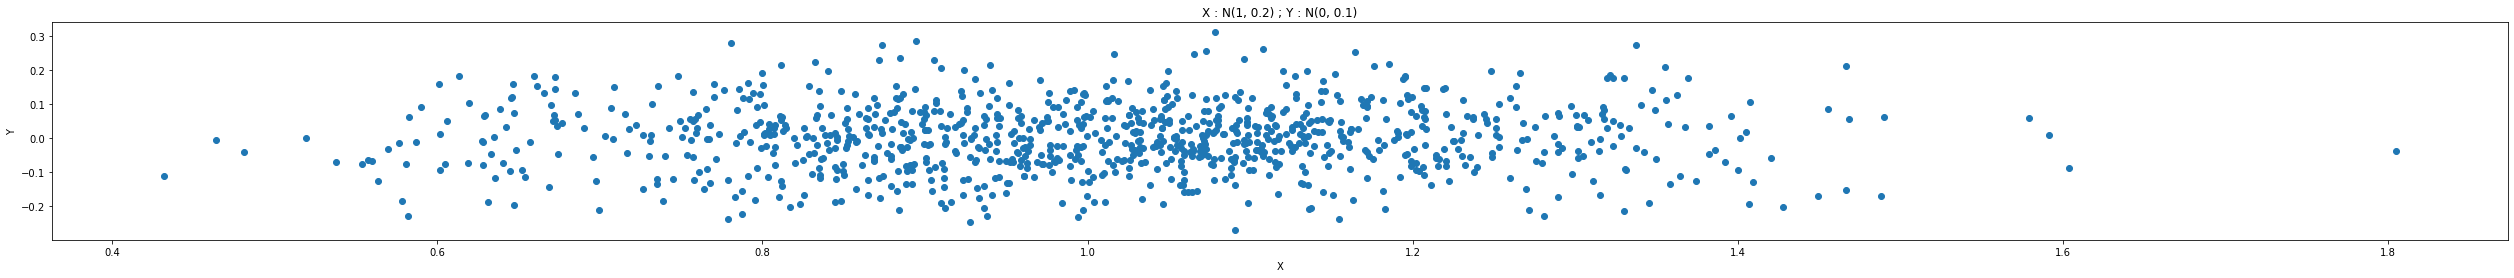

In [32]:
mu1, mu2 = 1, 0
sigma1, sigma2 = 0.2, 0.1

x_data = np.random.normal(mu1, sigma1, 1000)
y_data = np.random.normal(mu2, sigma2, 1000)

fig1, ax1 = plt.subplots(figsize=(44,4))
ax1.scatter(x_data, y_data)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title(f'X : N({mu1}, {sigma1}) ; Y : N({mu2}, {sigma2})')

### Plus de représentations graphiques
MATPLOTLIB permet de représenter graphiquement des séries de nombres que nous lui fournissons **explicitement**.

Dans le cas précédent, *x_data* et *y_data* pour les valeurs des points en abscisse et ordonnée respectivement.

TOUT graphique doit débuter par un appel à la méthode *subplots* de l'objet *matplotlib.pyplot* (ici nommé *plt*).

`fig, ax = plt.subplots()`
- `fig` est un objet [Figure](https://matplotlib.org/stable/api/figure_api.html) qui controle les paramètres de toute la figure
- `ax` est **un ou des** objets [Axes](https://matplotlib.org/stable/api/axes_api.html#basic), **chaque objet "Axes" controlant un seul graphique**

#### Superposer plusieurs graphiques

Les appels successifs au même objet Axes pour différent graphiques vont les superposer.
En reprenant l'exemple précédent, dessinons deux nuages de points sur le même graphique.
```python
x1_data = np.random.normal(1, 0.2, 50)
y1_data = np.random.normal(0, 0.2, 50)

x2_data = np.random.normal(0.5, 0.2, 50)
y2_data = np.random.normal(-3, 0.1, 50)
```
Puis dessinons les successivement sur le **même objet "Axes"**.

$\rightarrow$ Profitons en pour découvrir
* le paramètre *marker* de la fonction *Axes.scatter*
* la méthode *Figure.legend()* en combinaison avec le paramètre *label*

(https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers)
```python
fig2, ax2 = plt.subplots(figsize=(4,4))
ax2.scatter(x1_data, y1_data, label="dataset1")
ax2.scatter(x2_data, y2_data, marker="X")

fig2.legend(loc='upper left')
```
<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous. Vous oberverez que deux couleurs différentes sont automatiquement utilisées. Le paramètre *color* peut aussi permettre de spécifier une couleur.</span>
<h5>PUIS</h5>

<span style="color:firebrick;font-weight:bold"> $\rhd$  Réaliser ce graphique dans une cellule suivante en utilisant la même couleur mais des symboles différents pour les deux jeux de points.  La légende de la figure mentionnera les  couples {moyenne, écart-type} des deux jeux de données.</span>

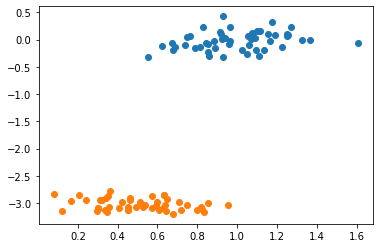

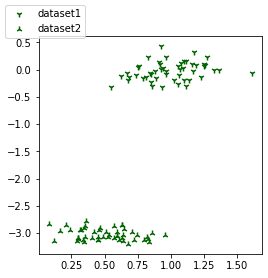

In [63]:
fig, ax = plt.subplots()

x1_data = np.random.normal(1, 0.2, 50)
y1_data = np.random.normal(0, 0.2, 50)

x2_data = np.random.normal(0.5, 0.2, 50)
y2_data = np.random.normal(-3, 0.1, 50)

ax.scatter(x1_data, y1_data)
ax.scatter(x2_data, y2_data)

fig2, ax2 = plt.subplots(figsize=(4,4))
ax2.scatter(x1_data, y1_data, label="dataset1", marker="1", color="darkgreen")
ax2.scatter(x2_data, y2_data, label="dataset2", marker="2", color="darkgreen")

fig2.legend(loc='upper left')

### Représentation de fonctions continues

Ces graphiques sont produits par la méthode [Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html?highlight=plot#matplotlib.axes.Axes.plot)

Elles necessite un ensemble discret de valeur de x et y, la fonction plot se chargeant d'interpoler la courbe entre chaque valeur. On devra donc:
- générer un ensemble de valeurs dans le domaine de la fonction
- appliquer la fonction à chacune de ces valeurs pour produire le "co-domaine"
- passer les listes de valeurs du domaine et du co-domaine à *Axes.plot*


#####  Séries de valeurs également réparties entre deux bornes à l'aide de [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

Cette fonction numpy est essentielle pour représenter le domaine des fonctions continues. Par exemple, générons 1000 valeurs dans l'intervalle \[-10;10\].

```python
x  = np.linspace(-10, 10, 10000)
```
Puis appliquons à "ce domaine" les fonctions *cos(x)* et sin(x).
```python
y1 = np.cos(x)
y2 = np.sin(x)
```

##### Grille de graphiques
L'organisation de plusieurs graphiques dans une figure est controlée par les paramètre *ncols* et "nrows".

```python
fig3, ax3 = plt.subplots(figsize=(8,4),nrows = 1, ncols = 2)
````

Puis dessinons deux graphiques dans la même figure:
- Le dessin de gauche (*ax3[0]*) étant la fonction cos(x), entre -10 et 10 en vert épais.
- Le dessin de droite (*ax3[1]*) étant la fonction sinx(x) entre -10 et 10 en traits d'union.

```python
fig3, ax3 = plt.subplots(figsize=(8,4),nrows = 1, ncols = 2)
ax3[0].plot(x, y1, color='green', linewidth=2)
ax3[1].plot(x, y2, linestyle='dashed')
```

<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous. Comme plusieurs graphiques sont produits, la variable `ax3` ci-dessous devient **une liste (de liste) d'objet Axes** !!!. <br/>$\Rightarrow$Assurez-vous en inspectant l'objet ax3</span>
<h5>PUIS</h5>

<span style="color:firebrick;font-weight:bold"> $\rhd$ Rajouter une [grille](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html) au graphique de droite et le titre de la fonction trigonometrique à chaque graphique.</span>

[<AxesSubplot:> <AxesSubplot:>]


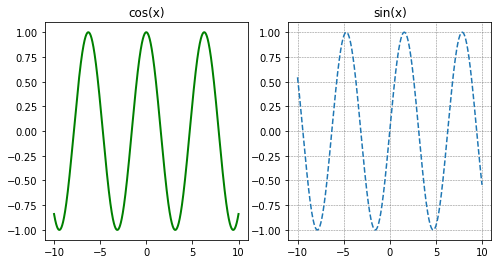

In [97]:
x  = np.linspace(-10, 10, 10000)

y1 = np.cos(x)
y2 = np.sin(x)

fig3, ax3 = plt.subplots(figsize=(8,4),nrows = 1, ncols = 2)
print(ax3)
ax3[0].plot(x, y1, color='green', linewidth=2)
ax3[1].plot(x, y2, linestyle='dashed')

ax3[0].set_title('cos(x)')
ax3[1].set_title('sin(x)')

ax3[1].grid(color='grey', linestyle='--', linewidth=0.5)

<span style="color:firebrick;font-weight:bold"> $\rhd$ Dessiner la grille de 4 graphiques suivante en ajoutant un titre et des couleurs, epaisseurs et lignes différentes à chaque graphique. Les représentations couvriront le domaine [15; 15]. </span>

<table>
<tr> <td>cos(x)</td><td>sin(x)</td></tr>
<tr> <td>arctan(x)</td><td>tan(x)</td></tr>
</table>

Text(0.5, 1.0, 'tan(x)')

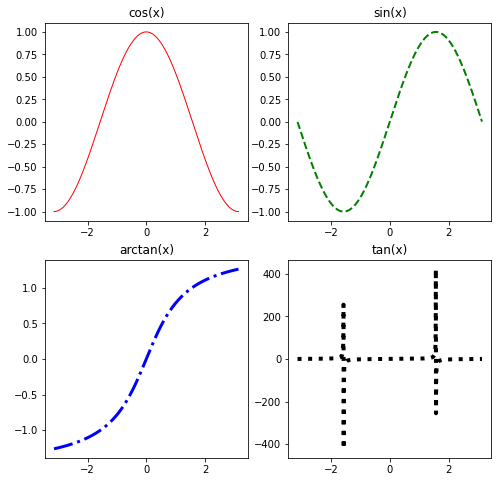

In [142]:
x  = np.linspace(-3.14, 3.14, 1000)

y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.arctan(x)
y4 = np.tan(x)

fig3, ax3 = plt.subplots(figsize=(8,8), nrows=2, ncols=2)
ax3[0][0].plot(x, y1, color='red', linestyle='solid', linewidth=1)
ax3[0][1].plot(x, y2, color='green', linestyle='dashed', linewidth=2)
ax3[1][0].plot(x, y3, color='blue', linestyle='dashdot', linewidth=3)
ax3[1][1].plot(x, y4, color='black', linestyle='dotted', linewidth=4)

ax3[0,0].set_title('cos(x)')
ax3[0,1].set_title('sin(x)')
ax3[1,0].set_title('arctan(x)')
ax3[1,1].set_title('tan(x)')

### <span style="color:green;">C'est tout pour cette Introduction</span>
### <span style="color:green;">N'hesitez pas à jouer avec certains paramètres de cette dernière figure et observer leurs effets</span>
### <span style="color:green;">Vous pourrez ensuite passer au TP1</span>